# Code for experimenting with impelementing periodicity

In [18]:
import scipy.io
import numpy as np
import auxfunctions as aux

Z, C, W, m = aux.load_data('./data/SG_data.msgpack')

initialdata = scipy.io.loadmat('./data/1_step_solutions.mat')

Z_test_1 = initialdata['Z'][:,:,0]
Z_test_2 = initialdata['Z'][:,:,1]
Z_test_3 = initialdata['Z'][:,:,2]
w_test_1 = initialdata['w'][:,0]
w_test_2 = initialdata['w'][:,1]
w_test_3 = initialdata['w'][:,2]
Z0_test = initialdata['Z0']
C_test_1 = initialdata['C'][:,:,0]
C_test_2 = initialdata['C'][:,:,1]
C_test_3 = initialdata['C'][:,:,2]

bx = [-1000000.0, -5112.42651350665, 1000000.0, 5112.42651350665]

In [ ]:
import optimaltransportsolver as ots

Z = Z_test_2
D = ots.make_domain(bx, True, False)
w0 = w_test_2
per_tol = 1e-3

sol = ots.ot_solve(D, Z, w0, per_tol, True, False, bx, solver = 'Scipy', debug = True)

In [ ]:
import optimaltransportsolver as ots
from pysdot import PowerDiagram
import pyvista as pv

Z = Z_test_2
domain = ots.make_domain(bx, False, False)
w0 = sol[1]
C = sol[0]

pd = PowerDiagram( positions = Z, domain = domain, weights = w0 )

filename = 'pb.vtk'
pd.display_vtk( filename )

# Mass of cells
colours=pd.integrals()

# Read the data
grid=pv.read(filename)

# create cell data that gives the cell volumes, this allows us to colour by cell volumes
cell_colours = colours[grid.cell_data['num'].astype(int)]
grid.cell_data['colours']=cell_colours

# plot the data with an automatically created plotter, for a static picture use backend='static'
plotter = pv.Plotter(window_size=[800,800], notebook = True, off_screen=False)
plotter.add_mesh(grid) #, clim=[minvel, maxvel])

plotter.set_scale(xscale=0.1, yscale=10)

# Set the camera for 2D view
plotter.camera_position = 'xy'

# Render the frame
plotter.show()

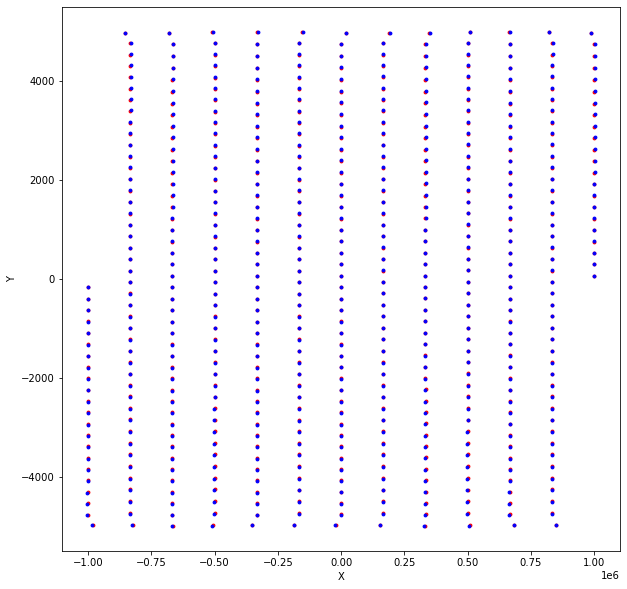

In [23]:
import matplotlib.pyplot as plt

#Plot the seeds

fig = plt.figure()
fig.set_size_inches(10, 10, True)
ax = fig.add_subplot()
ax.scatter(C_test_3[:,0], C_test_3[:,1], color= 'red', s = 8)
ax.scatter(C[3,:,0], C[3,:,1], color= 'blue', s = 8)
# ax.set_xlim([-1.25e6, 1.25e6])
# ax.set_ylim([-0.25e7, 3e7])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

In [16]:
diff = np.linalg.norm(Z0_test.astype(float) - Z[0].astype(float), axis = 1) ** 2

print(Z0_test[100]- Z[0,100])

[-5.15763203e-01 -1.25833656e+03]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Plot the centroids

fig = plt.figure()
fig.set_size_inches(10, 10, True)
ax = fig.add_subplot()
ax.scatter(Z[:,0], Z[:,1], color= 'blue', s = 8)
ax.set_xlim([np.max(Z[:,0]), np.min(Z[:,0])])
ax.set_ylim([np.max(Z[:,1]), np.min(Z[:,1])])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()